In [306]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.optimize import curve_fit

In [307]:
# Graph 1 left part, division price: x - 1 V, y - 0.02 mA
x_left_division_price = 1
y_left_division_price = 0.02

x_left = np.sort((np.concatenate((np.arange(-4, 2.9, 0.5), np.linspace(3, 3.5, 11))) + 4) * (-1) * x_left_division_price)
y_left = np.sort((np.array([-5]*13 + [-4.8, -4.5] + [y for y in range(-4, 6)]) + 5) * (-1) * y_left_division_price)

# print(x_left, x_left.size)
# print(y_left, y_left.size)

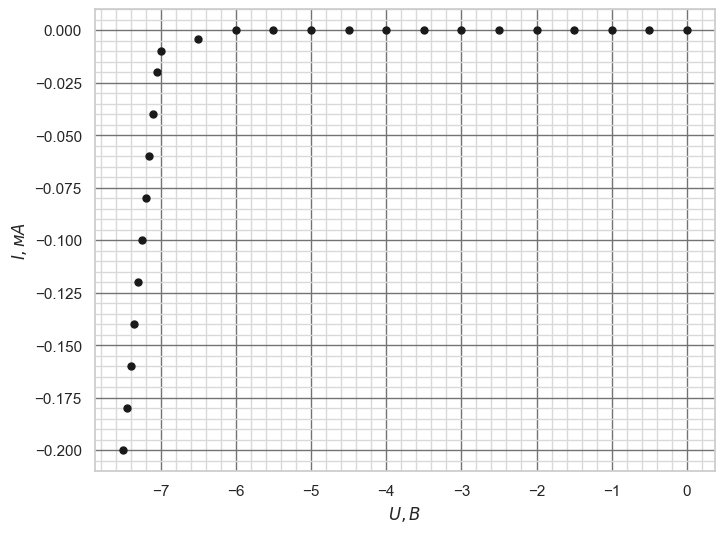

In [308]:
plt.figure(figsize=(8, 6))
sns.set(context = 'notebook')
sns.set(style = 'whitegrid')

plt.grid(visible = True, which = 'major', color = '0.45', linestyle = '-')
plt.grid(visible = True, which = 'minor', color = '0.85', linestyle = '-')
plt.minorticks_on()

plt.xlabel(r'$U, В$')
plt.ylabel(r'$I, мА$')

plt.scatter(x_left, y_left, color = 'k', s = 25)

plt.savefig('Diod_1_left_part.png', dpi = 400)

In [309]:
# Graph 1 left part, division price: x - 0.1 V, y - 0.02 mA
x_right_division_price = 0.1
y_right_division_price = 0.02

x_right = np.sort((np.concatenate((np.linspace(-0.8, 3.3, 10), np.array([-1, -1.2, -1.3, -1.4, -1.5, -1.55]), 
                          np.linspace(-1.95, -1.6, 10), np.linspace(-2, -1.95, 5, endpoint = False))) - 3.3) * (-1) * x_right_division_price) 
y_right = np.sort((np.concatenate((np.linspace(2.5, 2.9, 10), np.array([2.4, 2.3, 2, 1.8, 1.4, 1.2]), 
                          np.linspace(-2, 1, 10), np.linspace(-3.4, -2, 5, endpoint = False))) - 2.9) * (-1) * y_right_division_price)

# print(y_right, y_right.size)
# print(x_right, x_right.size)

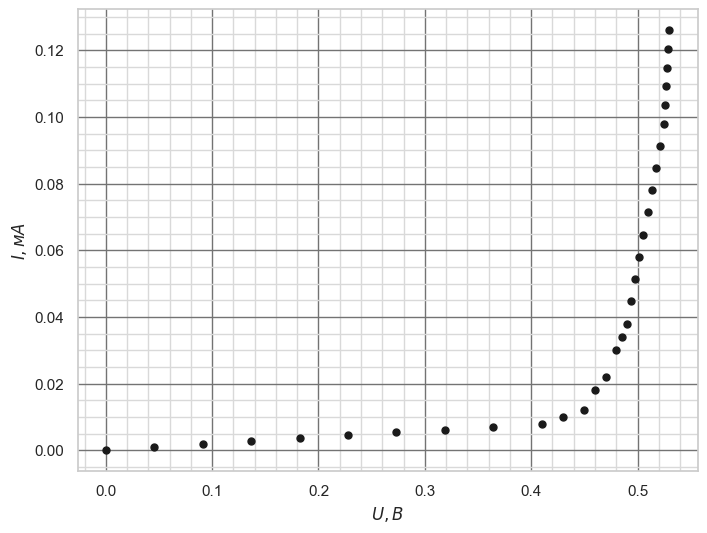

In [310]:
plt.figure(figsize=(8, 6))
sns.set(context = 'notebook')
sns.set(style = 'whitegrid')

plt.grid(visible = True, which = 'major', color = '0.45', linestyle = '-')
plt.grid(visible = True, which = 'minor', color = '0.85', linestyle = '-')
plt.minorticks_on()

plt.xlabel(r'$U, В$')
plt.ylabel(r'$I, мА$')

plt.scatter(x_right, y_right, color = 'k', s = 25)

plt.savefig('Diod_1_right_part.png', dpi = 400)

In [311]:
x = np.concatenate((x_left, x_right))
y = np.concatenate((y_left, y_right))

# print(x)
# print(y)

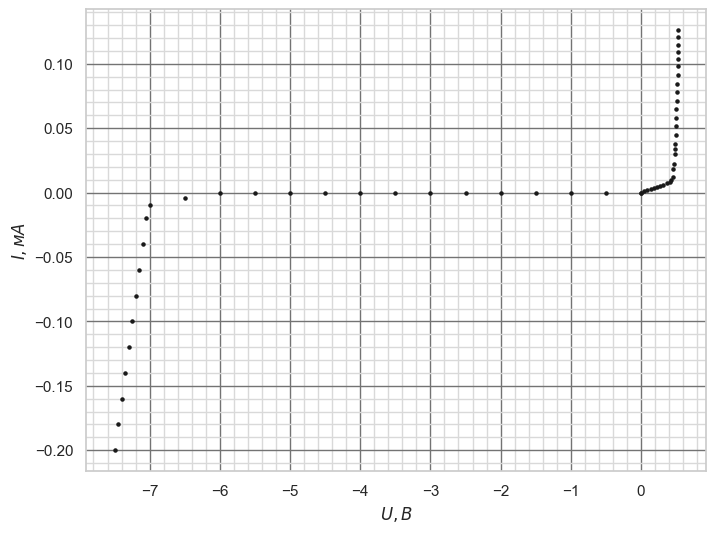

In [312]:
plt.figure(figsize=(8, 6))
sns.set(context = 'notebook')
sns.set(style = 'whitegrid')

plt.grid(visible = True, which = 'major', color = '0.45', linestyle = '-')
plt.grid(visible = True, which = 'minor', color = '0.85', linestyle = '-')
plt.minorticks_on()

plt.xlabel(r'$U, В$')
plt.ylabel(r'$I, мА$')

plt.scatter(x, y, color = 'k', s = 5)
# plt.plot(x_right, y_right, color = 'k')

plt.savefig('Diod_1_whole.png', dpi = 400)

In [313]:
#Saturation currents

phi = 26 * 10**(-3) # 26 mV
y_sat = y_right/(np.exp(x_right/phi) - 1)

# print(y_sat, y_sat.size)
# print(y_right, y_right.size)

C:\Users\админ\AppData\Local\Temp\ipykernel_22760\111300486.py:4: RuntimeWarning: invalid value encountered in divide
  y_sat = y_right/(np.exp(x_right/phi) - 1)


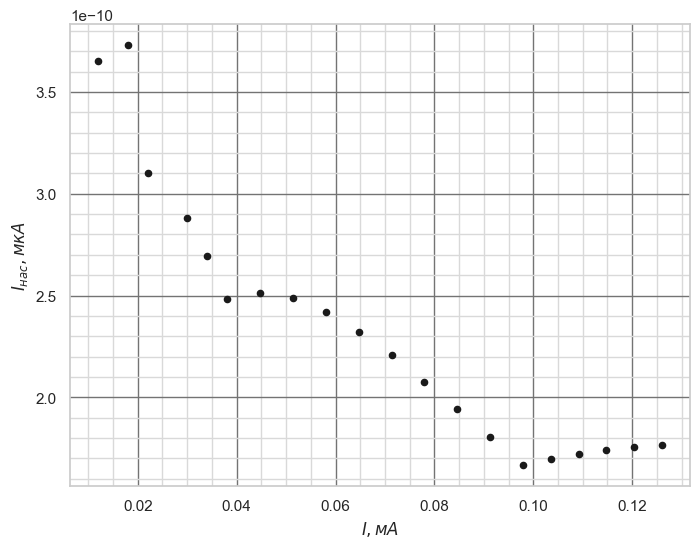

In [314]:
plt.figure(figsize=(8, 6))
sns.set(context = 'notebook')
sns.set(style = 'whitegrid')

plt.grid(visible = True, which = 'major', color = '0.45', linestyle = '-')
plt.grid(visible = True, which = 'minor', color = '0.85', linestyle = '-')
plt.minorticks_on()

plt.xlabel(r'$I, мА$')
plt.ylabel(r'$I_{нас}, мкА$')

plt.scatter(y_right[11:], y_sat[11:], color = 'k', s = 20)

plt.savefig('Diod_1_saturation_current.png', dpi = 400)

I_d0 = 6.8213565572822e-08 мА
theta = 1.4174142256865268


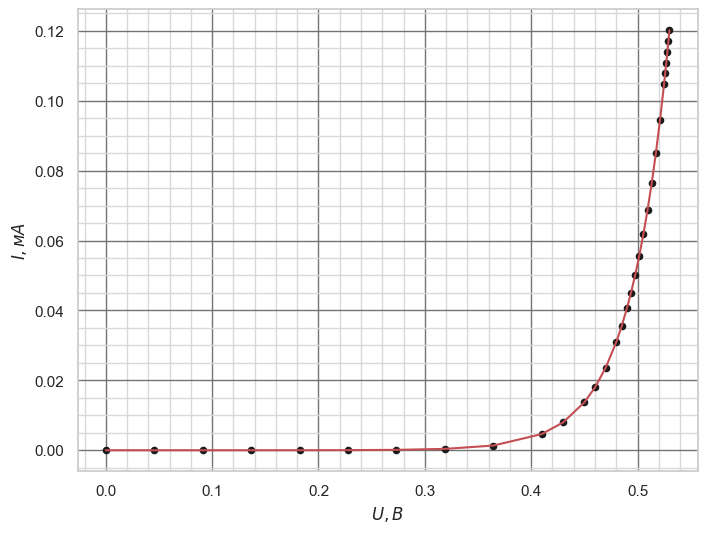

In [315]:
# theta and Id_0

[id_0, theta], res1 = curve_fit(lambda x_fit, id_0, theta: id_0*(np.exp(x_fit/(theta*phi)) - 1),  x_right,  y_right)

y_fit = id_0*(np.exp(x_right/(theta*phi)) - 1)

plt.figure(figsize=(8, 6))
sns.set(context = 'notebook')
sns.set(style = 'whitegrid')

plt.grid(visible = True, which = 'major', color = '0.45', linestyle = '-')
plt.grid(visible = True, which = 'minor', color = '0.85', linestyle = '-')
plt.minorticks_on()

plt.xlabel(r'$U, В$')
plt.ylabel(r'$I, мА$')

plt.scatter(x_right, y_fit, color = 'k', s = 20)
plt.plot(x_right, y_fit, color = 'r')

print('I_d0 =', id_0, 'мА')
print('theta =', theta)

plt.savefig('Diod_1_approximation.png', dpi = 400)